<a href="https://colab.research.google.com/github/BooEiEi/risk_2024/blob/main/logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Risk_2024' #เข้า drive
data = pd.read_csv(os.path.join(path,'train.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy.stats import randint, uniform

In [3]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data = data.drop(columns=['id', 'CustomerId', 'Surname'])

In [6]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<Axes: >

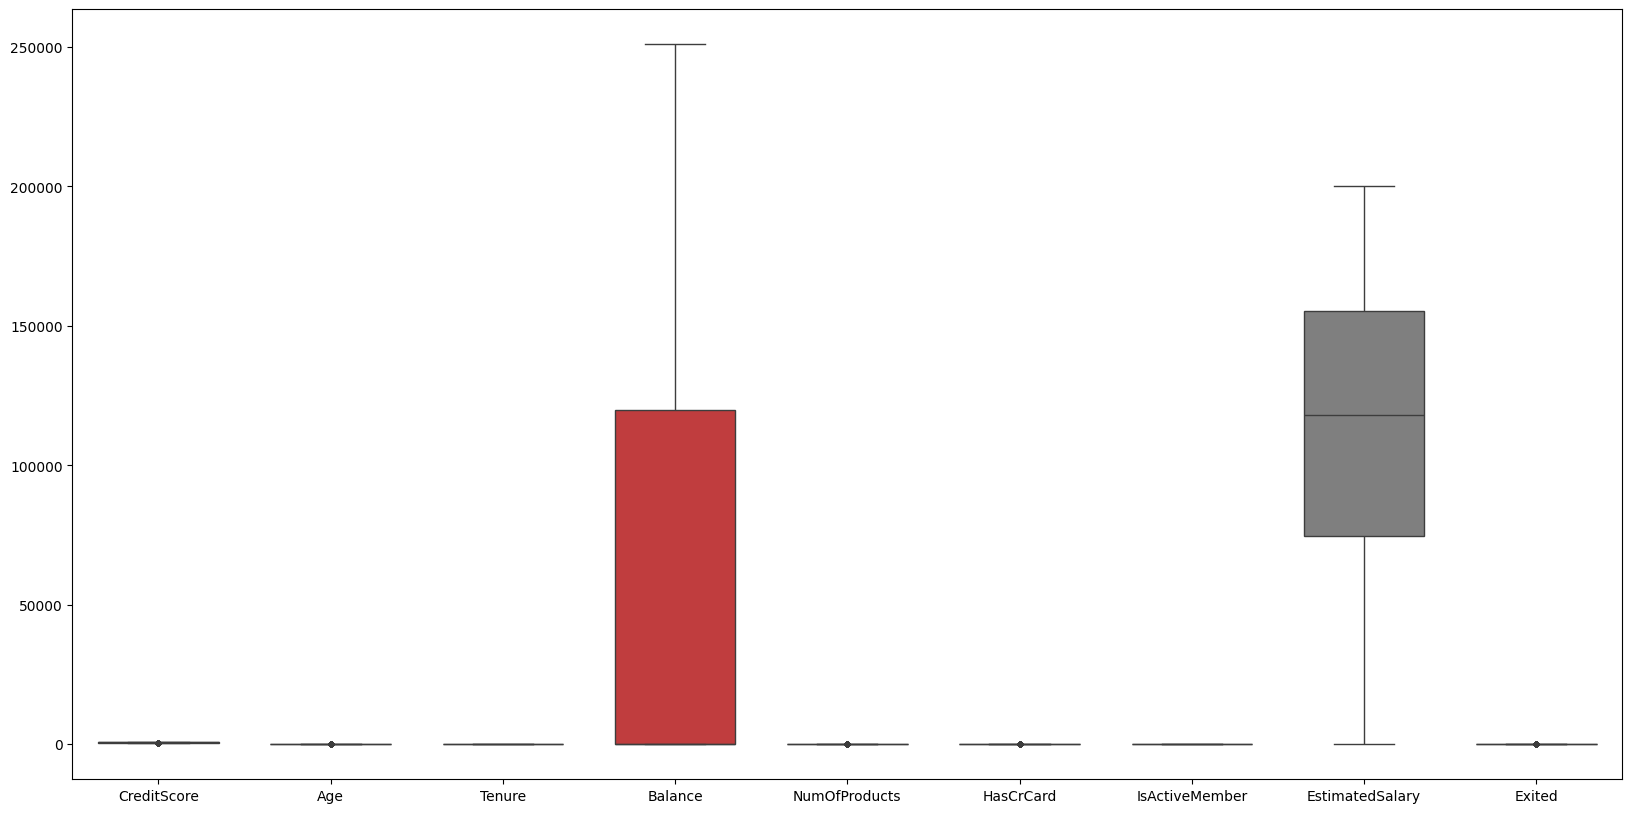

In [8]:
matplotlib.rcParams['figure.figsize'] = 20, 10
sns.boxplot(data=data, fliersize=3, width=0.7)

# Encode categorical variables

## Gender
male == 1
female == 0

In [9]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['Gender'])

# printing label
label

array([1, 1, 1, ..., 1, 0, 1])

In [10]:
# removing the column 'Gender' from data
# as it is of no use now.
data.drop("Gender", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Gender'
data["Gender"] = label

# printing Dataframe
data

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,668,France,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,627,France,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,678,France,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,581,France,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1
4,716,Spain,33.0,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,33.0,2,0.00,1,1.0,1.0,131834.75,0,0
165030,792,France,35.0,3,0.00,1,0.0,0.0,131834.45,0,1
165031,565,France,31.0,5,0.00,1,1.0,1.0,127429.56,0,1
165032,554,Spain,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0


## Geography
France == 0
Germany == 1
Spain == 2

In [11]:
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['Geography'])

# printing label
label

array([0, 0, 0, ..., 0, 2, 0])

In [12]:
# removing the column 'Geography' from data
# as it is of no use now.
data.drop("Geography", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Geography'
data["Geography"] = label

# printing Dataframe
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,Geography
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,2
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Age              165034 non-null  float64
 2   Tenure           165034 non-null  int64  
 3   Balance          165034 non-null  float64
 4   NumOfProducts    165034 non-null  int64  
 5   HasCrCard        165034 non-null  float64
 6   IsActiveMember   165034 non-null  float64
 7   EstimatedSalary  165034 non-null  float64
 8   Exited           165034 non-null  int64  
 9   Gender           165034 non-null  int64  
 10  Geography        165034 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 13.9 MB


#Loading and Preprocessing Data

In [14]:
X = data.drop(columns=['Exited'])
y = data['Exited'] # 1 = Churn 0 = Not churn

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Scaler1 = scaler.fit_transform(X)

In [18]:
Scaler1

array([[0.636     , 0.2027027 , 0.3       , ..., 0.9072786 , 1.        ,
        0.        ],
       [0.554     , 0.2027027 , 0.1       , ..., 0.24748323, 1.        ,
        0.        ],
       [0.656     , 0.2972973 , 1.        , ..., 0.92436383, 1.        ,
        0.        ],
       ...,
       [0.43      , 0.17567568, 0.5       , ..., 0.63715075, 1.        ,
        0.        ],
       [0.408     , 0.16216216, 0.7       , ..., 0.35584123, 0.        ,
        1.        ],
       [1.        , 0.17567568, 0.1       , ..., 0.30788045, 1.        ,
        0.        ]])

In [19]:
data_1 = pd.DataFrame(Scaler1)
data_1 = data_1.rename(columns={0: 'CreditScore' ,1: 'Age',2:'Tenure', 3:'Balance',4:'NumOfProducts',
                                5:'HasCrCard',6:'IsActiveMember',7:'EstimatedSalary',
                                8:'Gender',9:'Geography'})
data_1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender,Geography
0,0.636,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,1.0,0.0
1,0.554,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,1.0,0.0
2,0.656,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,1.0,0.0
3,0.462,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,1.0,0.0
4,0.732,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
165029,0.634,0.202703,0.2,0.000000,0.000000,1.0,1.0,0.659179,0.0,1.0
165030,0.884,0.229730,0.3,0.000000,0.000000,0.0,0.0,0.659177,1.0,0.0
165031,0.430,0.175676,0.5,0.000000,0.000000,1.0,1.0,0.637151,1.0,0.0
165032,0.408,0.162162,0.7,0.643819,0.000000,0.0,1.0,0.355841,0.0,1.0


# split data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size=0.2, random_state=99)

#Model building

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [26]:
y_pred = model.predict(X_test)

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[24623,  1157],
       [ 4781,  2446]])

Text(0.5, 885.5555555555555, 'Predicted label')

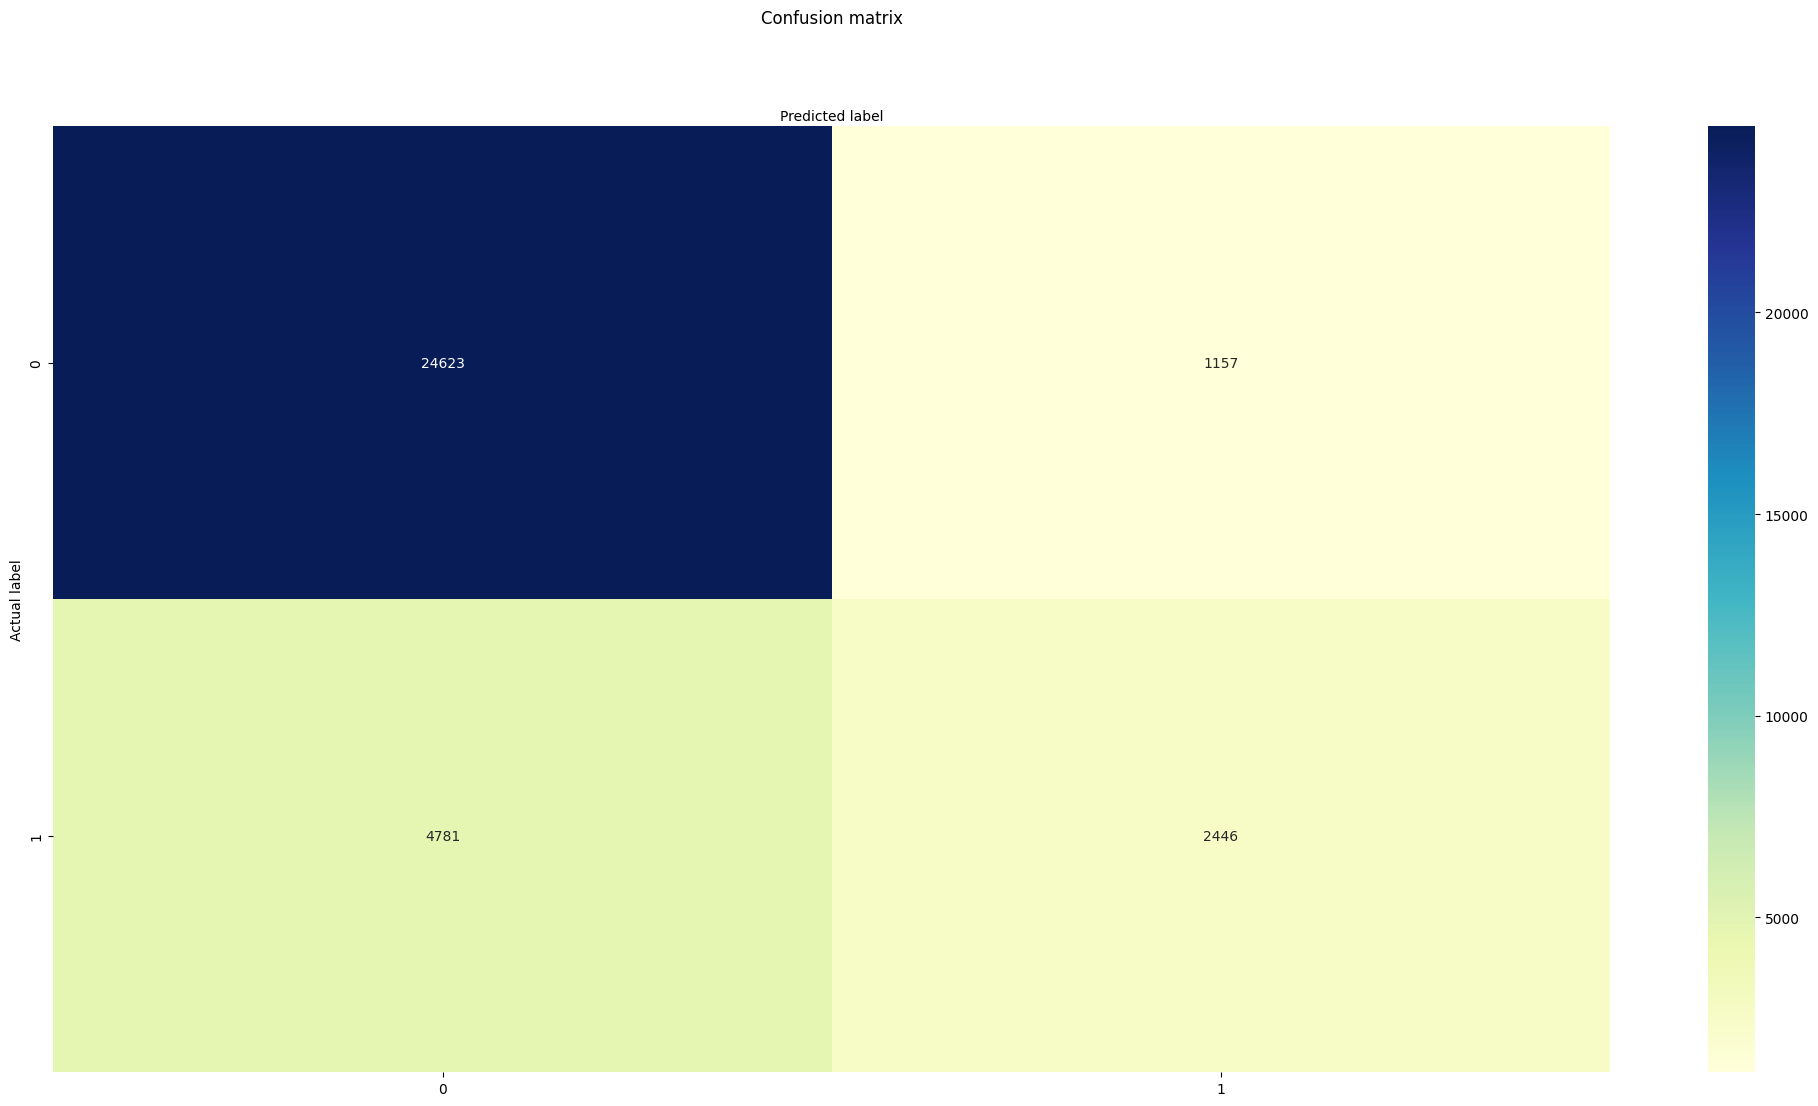

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import classification_report
target_names = ['Not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Not churn       0.84      0.96      0.89     25780
       churn       0.68      0.34      0.45      7227

    accuracy                           0.82     33007
   macro avg       0.76      0.65      0.67     33007
weighted avg       0.80      0.82      0.80     33007

